# Instalação de Bibliotecas

In [75]:
!pip install xgboost -q xgboost

# Leitura dos dados

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xg
from math import sqrt

In [77]:
df = pd.read_csv('../../train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [78]:
used_cols = []

In [79]:
df_test = pd.read_csv('../../test.csv')
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Funções auxiliares

## Genéricas

In [80]:
def get_X_test(df, used_cols):
    X = df[used_cols].values
    return X

def create_submission(df_test, y_pred):
    submission_df = pd.DataFrame({'Id': df_test['Id'].values, 'SalePrice': y_pred})
    return submission_df

def filter_outliers(df):
    df = df.query("`LotArea` < 100000")
    return df

def check_nulls(cols):
    for col in cols:
        print(f"Percentage of nulls in {col}:")
        print(f"Train: {100*df_train[col].isna().sum()/ df_train.shape[0]:.2f}%")
        print(f"Val: {100*df_val[col].isna().sum()/ df_val.shape[0]:.2f}%")
        print(f"Test: {100*df_test[col].isna().sum()/ df_test.shape[0]:.2f}%\n")

def encode_qual(x):
    mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1 }
    
    if str(x)[0] == 'n':
        return 3 
    return mapping[x]

def apply_qual_encodings(cols):
    for col in cols:
        df_train[col] = df_train[col].apply(encode_qual)
        df_val[col] = df_val[col].apply(encode_qual)
        df_test[col] = df_test[col].apply(encode_qual)


## Plots

In [81]:
def plot_residuals(y_pred, y_test):
    residuals = y_pred - y_test
    
    sns.scatterplot(x=y_test.flatten(), y=residuals.flatten())
    plt.axhline(0, linestyle='--',color='red')
    plt.xlabel("Actual House Prices")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()   

def scatter(col_1, col_2):    
    plt.figure(figsize=(7, 5))
    plt.title(f"{col_1} x {col_2}")
    sns.scatterplot(data=df_train, x=col_1, y=col_2)

    plt.show()
    
def plot_histograms(df, columns, subplot_shape):
    rows, cols = subplot_shape
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  
    if len(columns) > 1:
        axes = axes.flatten()

    for i, col in enumerate(columns):
        bins = len(df[col].unique())
        if bins < 20:
            sns.histplot(df[col], ax=axes[i], bins=bins)
        else:
            sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_avg_sales_price_by_cat(df, columns, subplot_shape):
    rows, cols = subplot_shape
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  
    if len(columns) > 1:
        axes = axes.flatten()
    
    default_blue = sns.color_palette()[0]

    for i, col in enumerate(columns):
        sns.barplot(x=col, y='SalePrice', data=df, ax=axes[i], estimator=np.mean, errorbar=None, color=default_blue)
        axes[i].set_title(f"Avg Sale Price by {col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

# Split (Treino / Validação)

In [82]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

print(f"df_train shape: {df_train.shape}")
print(f"df_val shape: {df_val.shape}")

df_train shape: (1168, 81)
df_val shape: (292, 81)


# Análise Exploratória de Dados

## Lot Area

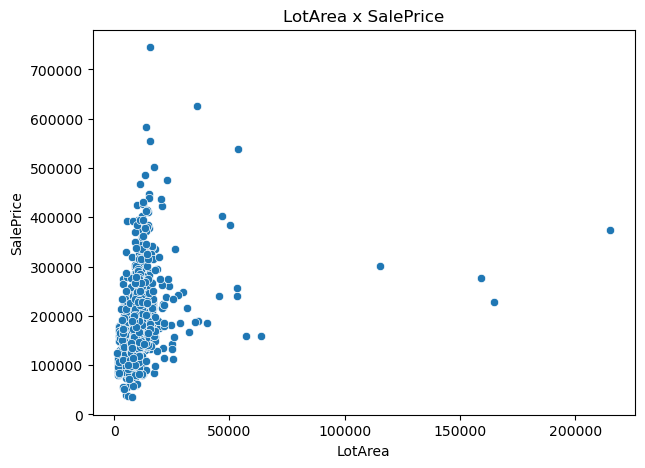

In [83]:
scatter('LotArea', 'SalePrice')

In [84]:
if 'LotArea' not in used_cols:
    used_cols.append('LotArea')

## Overall Quality and Condition

In [85]:
overall_cols = ['OverallQual', 'OverallCond']

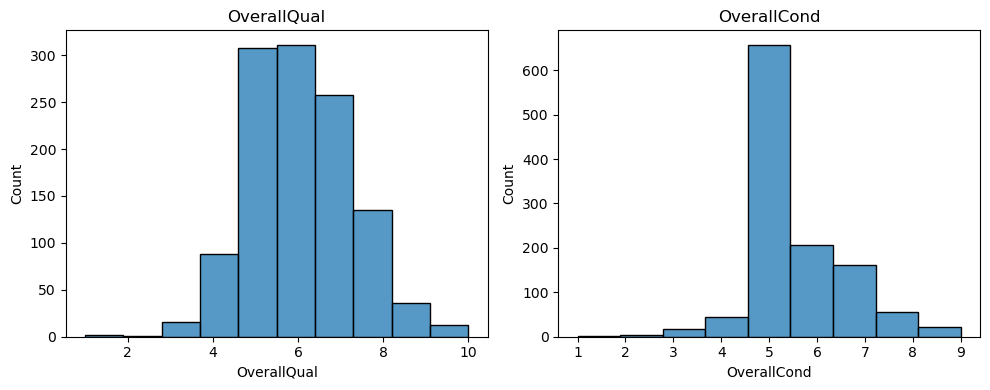

In [86]:
plot_histograms(df_train, overall_cols, (1,2))

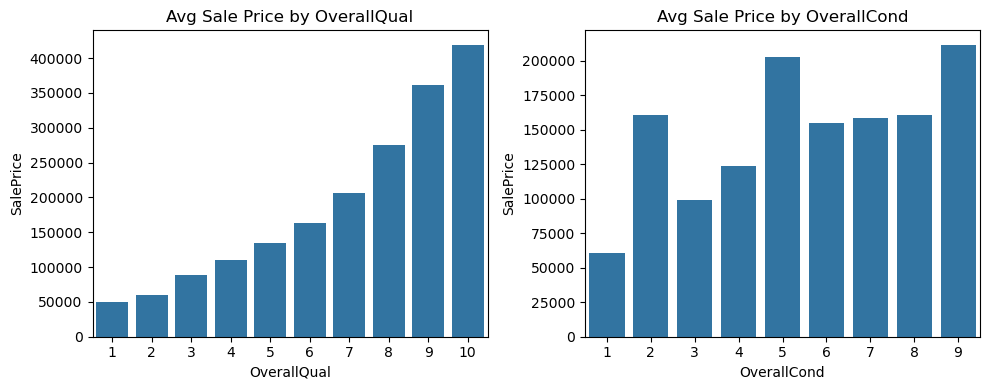

In [87]:
plot_avg_sales_price_by_cat(df_train, overall_cols, (1,2))

In [88]:
for col in overall_cols:
    if col not in used_cols:
        used_cols.append(col)

# PoolQC, PoolArea e Fence

In [89]:
new_cols = ['PoolArea', 'PoolQC', 'Fence']
check_nulls(new_cols)

Percentage of nulls in PoolArea:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in PoolQC:
Train: 99.49%
Val: 99.66%
Test: 99.79%

Percentage of nulls in Fence:
Train: 80.05%
Val: 83.56%
Test: 80.12%



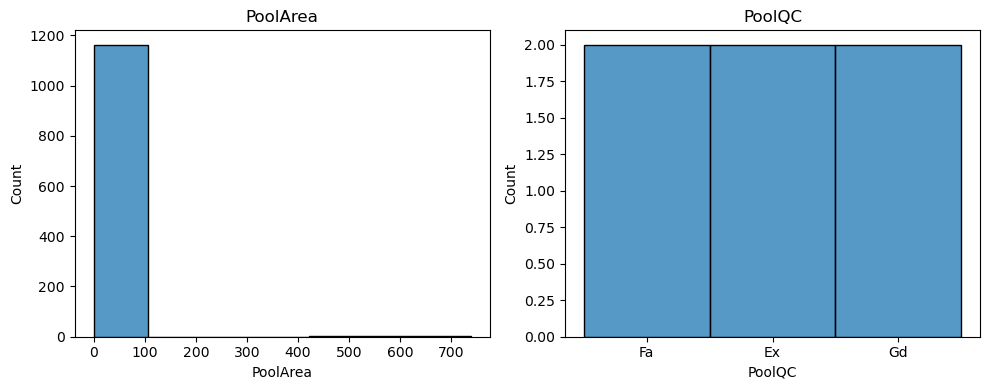

In [90]:
pool_cols = ['PoolArea', 'PoolQC']
plot_histograms(df_train, pool_cols, (1,2))

In [91]:
df_train.query("`PoolArea` > 0").shape[0]

6

# Kitchen

In [92]:
kitchen_cols =  ['KitchenAbvGr','KitchenQual']
check_nulls(kitchen_cols)

Percentage of nulls in KitchenAbvGr:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in KitchenQual:
Train: 0.00%
Val: 0.00%
Test: 0.07%



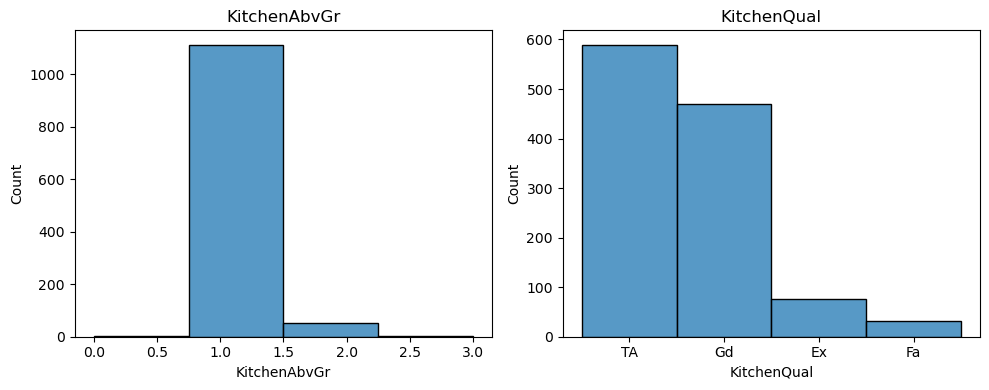

In [93]:
plot_histograms(df_train, kitchen_cols, (1,2))

In [94]:
kitchen_cols = ['KitchenAbvGr', 'KitchenQual']
for col in kitchen_cols:
    if col not in used_cols:
        used_cols.append(col)

In [95]:
apply_qual_encodings(['KitchenQual'])

In [96]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual
254,8400,5,6,1,3
1066,7837,6,7,1,3
638,8777,5,7,1,3
799,7200,5,7,1,4
380,5000,5,6,1,4
303,9800,5,7,1,3
86,11911,6,5,1,4
1385,5436,4,8,1,4
265,12090,6,6,1,4
793,9158,8,5,1,4


## BedroomAbvGr e TotRmsAbvGrd

In [101]:
room_cols = ['BedroomAbvGr', 'TotRmsAbvGrd']
check_nulls(room_cols)

Percentage of nulls in BedroomAbvGr:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in TotRmsAbvGrd:
Train: 0.00%
Val: 0.00%
Test: 0.00%



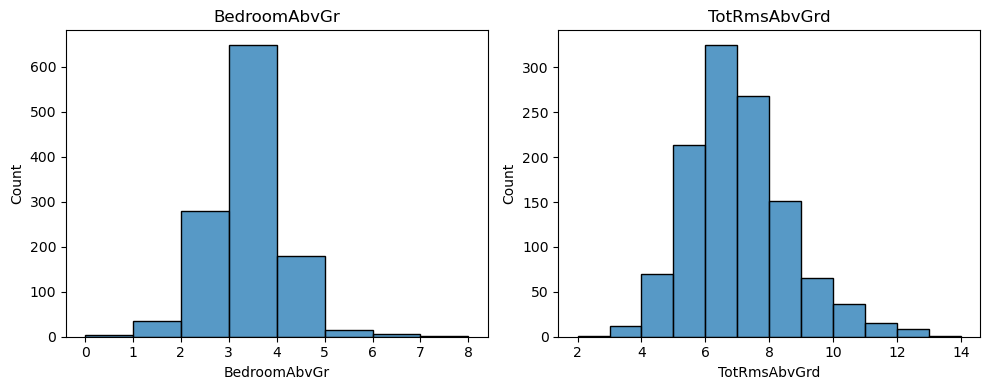

In [102]:
plot_histograms(df_train, room_cols, (1,2))

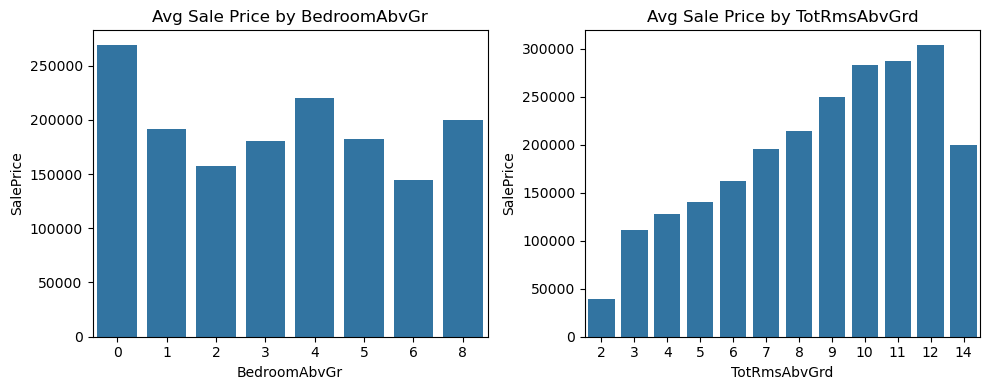

In [103]:
plot_avg_sales_price_by_cat(df_train, room_cols, (1,2))

In [104]:
for df in df_train, df_val, df_test:
    df['OtherRoomsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

In [160]:
used_cols.append('BedroomAbvGr')

# GrLivArea, LowQualFinSF, 1stFlrSF e 2ndFlrSF

In [106]:
area_cols = ['GrLivArea', 'LowQualFinSF', '1stFlrSF', '2ndFlrSF']
check_nulls(area_cols)

Percentage of nulls in GrLivArea:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in LowQualFinSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in 1stFlrSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in 2ndFlrSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%



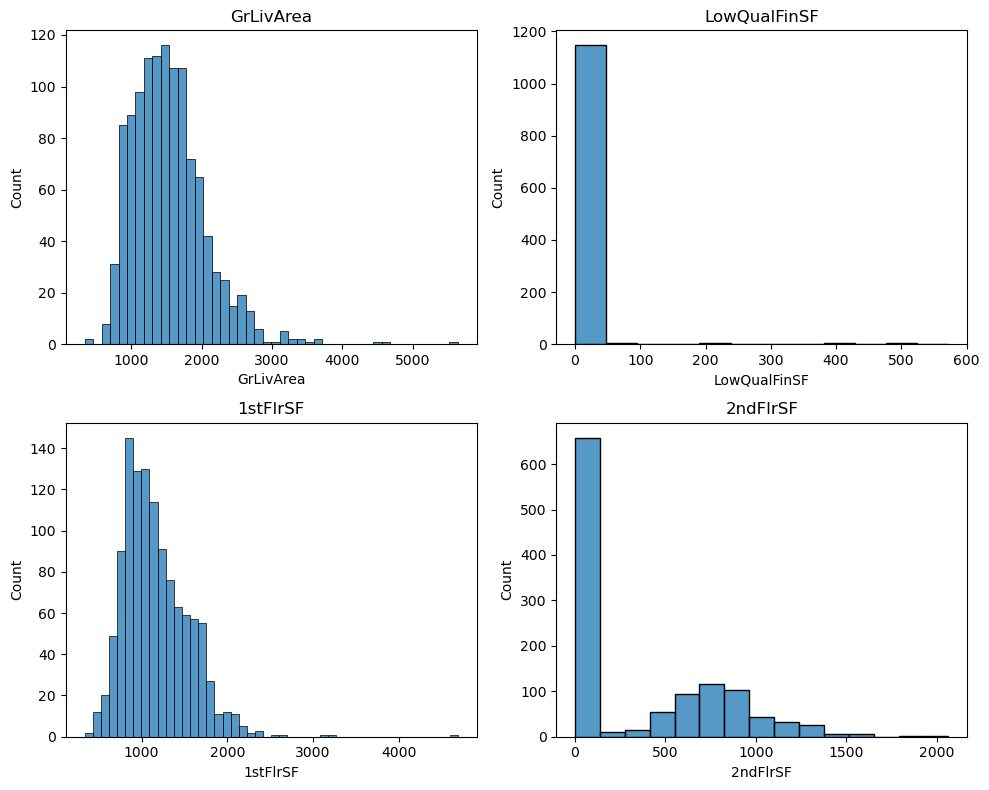

In [107]:
plot_histograms(df_train, area_cols, (2, 2))

In [108]:
area_used_cols = ['1stFlrSF', '2ndFlrSF']

for col in area_used_cols:
    if col not in used_cols:
        used_cols.append(col)

In [109]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,1stFlrSF,2ndFlrSF
254,8400,5,6,1,3,5,1314,0
1066,7837,6,7,1,3,7,799,772
638,8777,5,7,1,3,4,796,0
799,7200,5,7,1,4,7,981,787
380,5000,5,6,1,4,6,1026,665
303,9800,5,7,1,3,5,894,0
86,11911,6,5,1,4,6,684,876
1385,5436,4,8,1,4,7,796,358
265,12090,6,6,1,4,7,1422,0
793,9158,8,5,1,4,7,1496,0


## BsmtFullBath, BsmtHalfBath, HalfBath e FullBath

In [110]:
bath_cols = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath']

In [111]:
check_nulls(bath_cols)

Percentage of nulls in BsmtFullBath:
Train: 0.00%
Val: 0.00%
Test: 0.14%

Percentage of nulls in BsmtHalfBath:
Train: 0.00%
Val: 0.00%
Test: 0.14%

Percentage of nulls in HalfBath:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in FullBath:
Train: 0.00%
Val: 0.00%
Test: 0.00%



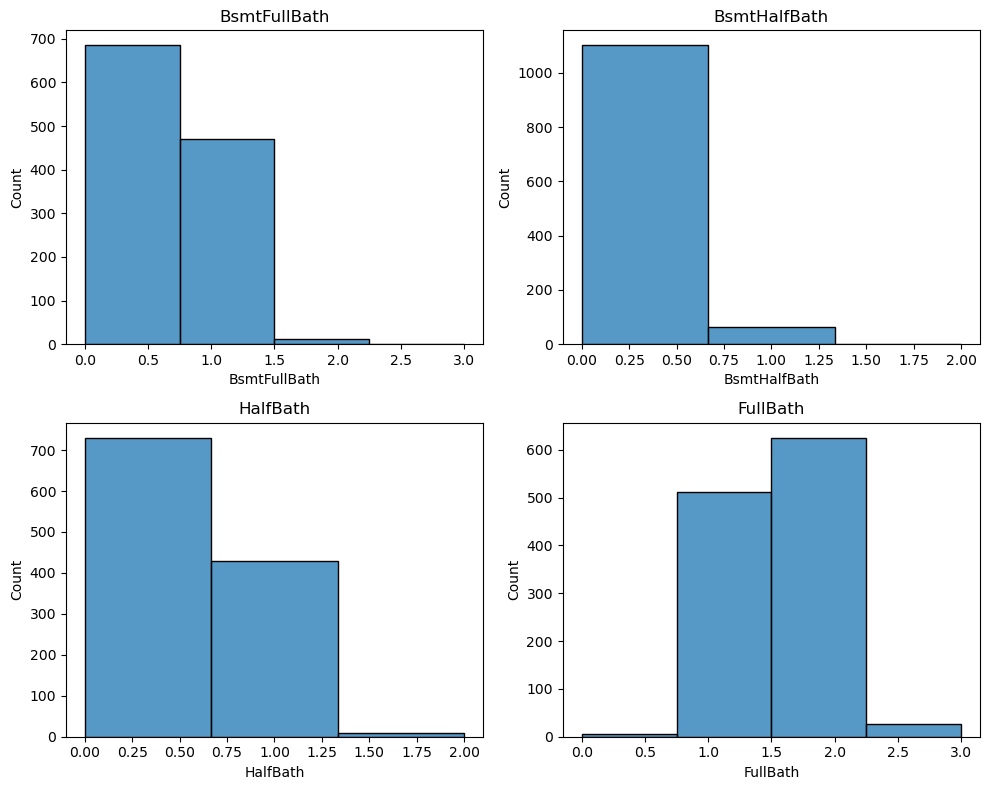

In [112]:
plot_histograms(df_train, bath_cols,(2,2))

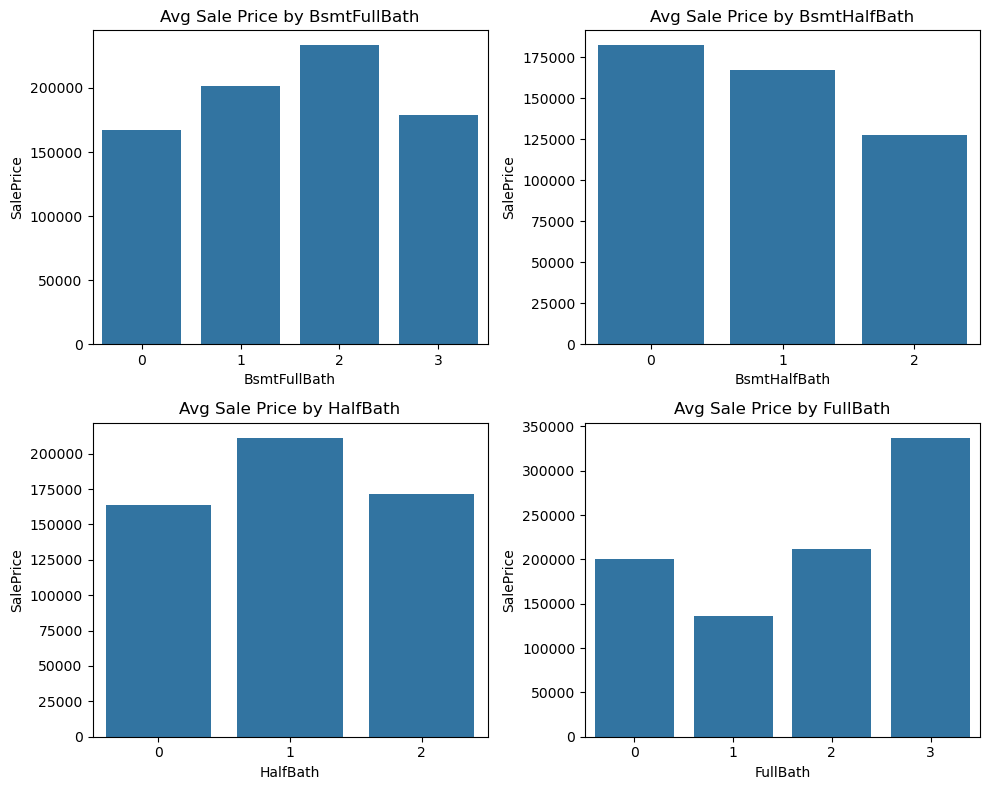

In [113]:
plot_avg_sales_price_by_cat(df_train, bath_cols,(2,2))

In [114]:
for col in ['HalfBath', 'FullBath', 'BsmtFullBath']:
    used_cols.append(col)

## Fireplaces e FireplaceQu

In [115]:
fireplace_cols = ['Fireplaces', 'FireplaceQu']

In [116]:
check_nulls(fireplace_cols)

Percentage of nulls in Fireplaces:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in FireplaceQu:
Train: 46.83%
Val: 48.97%
Test: 50.03%



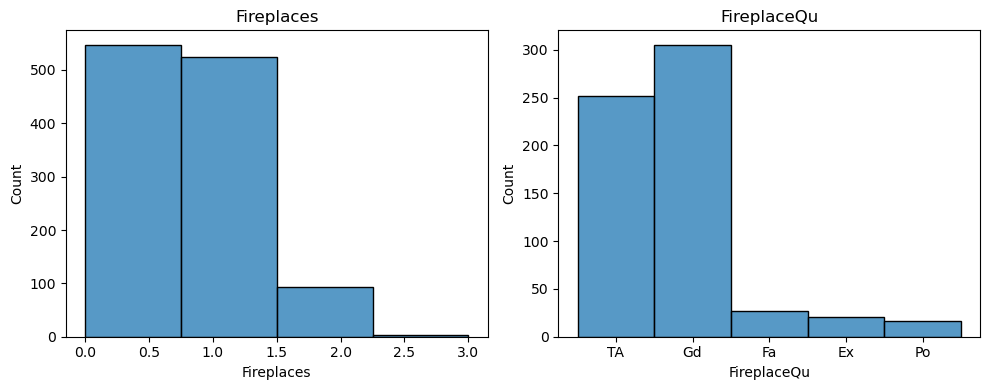

In [117]:
plot_histograms(df_train, fireplace_cols,(1,2))

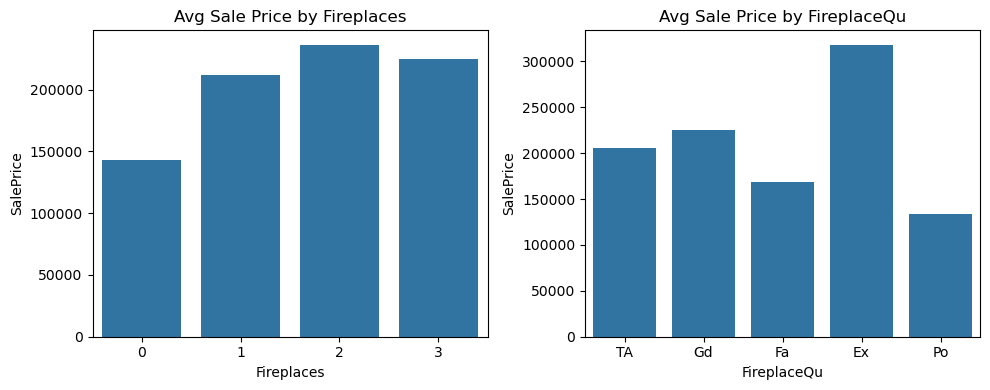

In [118]:
plot_avg_sales_price_by_cat(df_train, fireplace_cols,(1,2))

In [125]:
used_cols.append('Fireplaces')

## YrSold e MoSold

In [119]:
sold_cols = ['YrSold', 'MoSold']

In [120]:
check_nulls(sold_cols)

Percentage of nulls in YrSold:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in MoSold:
Train: 0.00%
Val: 0.00%
Test: 0.00%



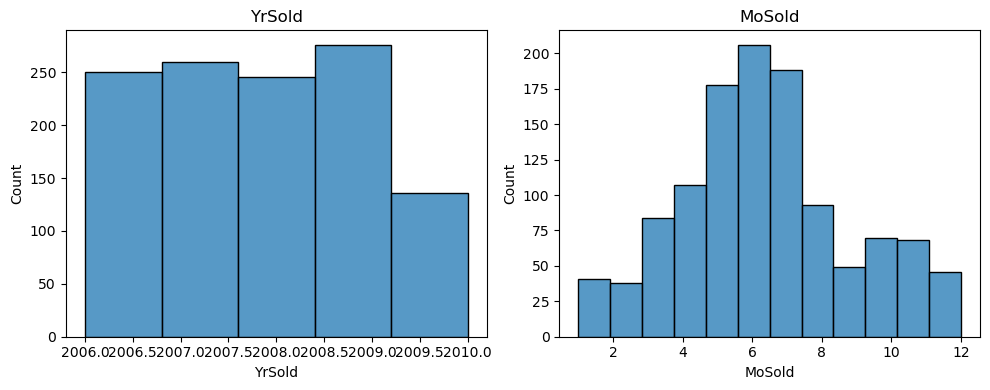

In [121]:
plot_histograms(df_train, sold_cols,(1,2))

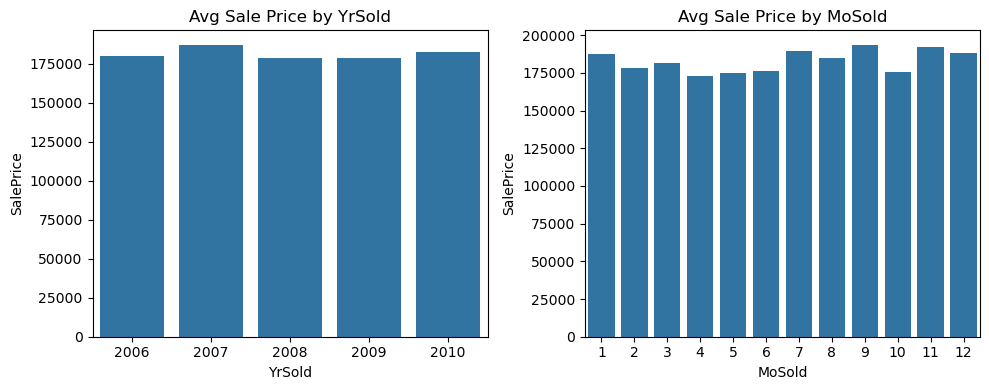

In [122]:
plot_avg_sales_price_by_cat(df_train, sold_cols,(1,2))

# Outliers

In [123]:
df_train = filter_outliers(df_train)

# Treino

In [161]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual,1stFlrSF,2ndFlrSF,HalfBath,FullBath,BsmtFullBath,Fireplaces,BedroomAbvGr
254,8400,5,6,1,3,1314,0,0,1,1,0,3
1066,7837,6,7,1,3,799,772,1,2,0,1,3
638,8777,5,7,1,3,796,0,0,1,0,0,2
799,7200,5,7,1,4,981,787,1,1,1,2,3
380,5000,5,6,1,4,1026,665,0,2,0,1,3
303,9800,5,7,1,3,894,0,0,1,1,0,3
86,11911,6,5,1,4,684,876,1,2,0,1,3
1385,5436,4,8,1,4,796,358,0,1,1,0,3
265,12090,6,6,1,4,1422,0,0,2,0,1,3
793,9158,8,5,1,4,1496,0,0,2,0,0,3


In [162]:
X_train = df_train[used_cols].values
y_train = df_train["SalePrice"].values


X_val = df_val[used_cols].values
y_val = df_val["SalePrice"].values

In [163]:
xgb_r = xg.XGBRegressor(n_estimators=10, seed=42).fit(X_train, y_train)

# Validação

In [164]:
y_pred_val = xgb_r.predict(X_val)

In [165]:
rms = sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE is {rms:.2f}")

RMSE is 29882.61


# Plot Residual

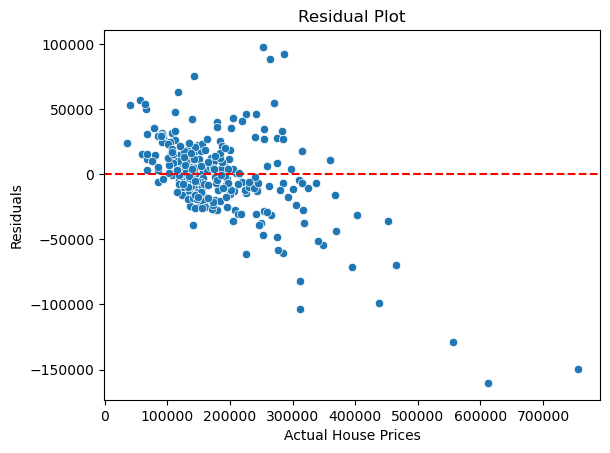

In [166]:
plot_residuals(y_pred_val, y_val)

In [167]:
X_test = get_X_test(df_test, used_cols)
y_pred_test = xgb_r.predict(X_test)

# Submissão

In [168]:
df = create_submission(df_test, y_pred_test)
df.to_csv('submission.csv',index=False)
df.head(10)

,Id,SalePrice
0,1461,126759.648438
1,1462,154080.312500
2,1463,145045.906250
3,1464,171413.156250
4,1465,198775.531250
5,1466,186814.578125
6,1467,161755.531250
7,1468,169892.203125
8,1469,199003.843750
9,1470,112632.867188


# Pontos-chave

- Adicionamos à nossa análise o TotRmsAbvGrd
- Adicionamos variáveis relacionadas aos banheiros (FullBath, HalfBath, BsmtFullBath)
- Analisamos os campos MoSold e YrSold
- Adicionamos a variável Fireplaces
- Primeiro score: 0.17120
- Segundo score: 0.17276
- Terceiro score: 0.16943